In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl
from torch.optim import lr_scheduler
import segmentation_models_pytorch as smp
import matplotlib.colors as mcolors

import os
import glob
from contextlib import contextmanager
import rasterio
import numpy as np
@contextmanager
def cwd(path: str) -> None:
    
    """
    Context manager para mudar o diretório de trabalho.
    Mantém o diretório original após a execução do bloco de código.
    """
    
    oldpwd = os.getcwd()
    os.chdir(path)
    try:
        yield
    finally:
        os.chdir(oldpwd)

c:\Users\alanb\anaconda3\envs\cloud\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
diretorio = 'D:/CloudSEN12+/p509/Imagens-Amazonia/'
with cwd(diretorio):
        imagens = sorted(os.listdir())

def normalize_band(band):
        #band = (band + 1000) / 10000
        #band = band.clip(min=0)
        
        return ((band - band.min()) / (band.max() - band.min()))

(15, 509, 509)


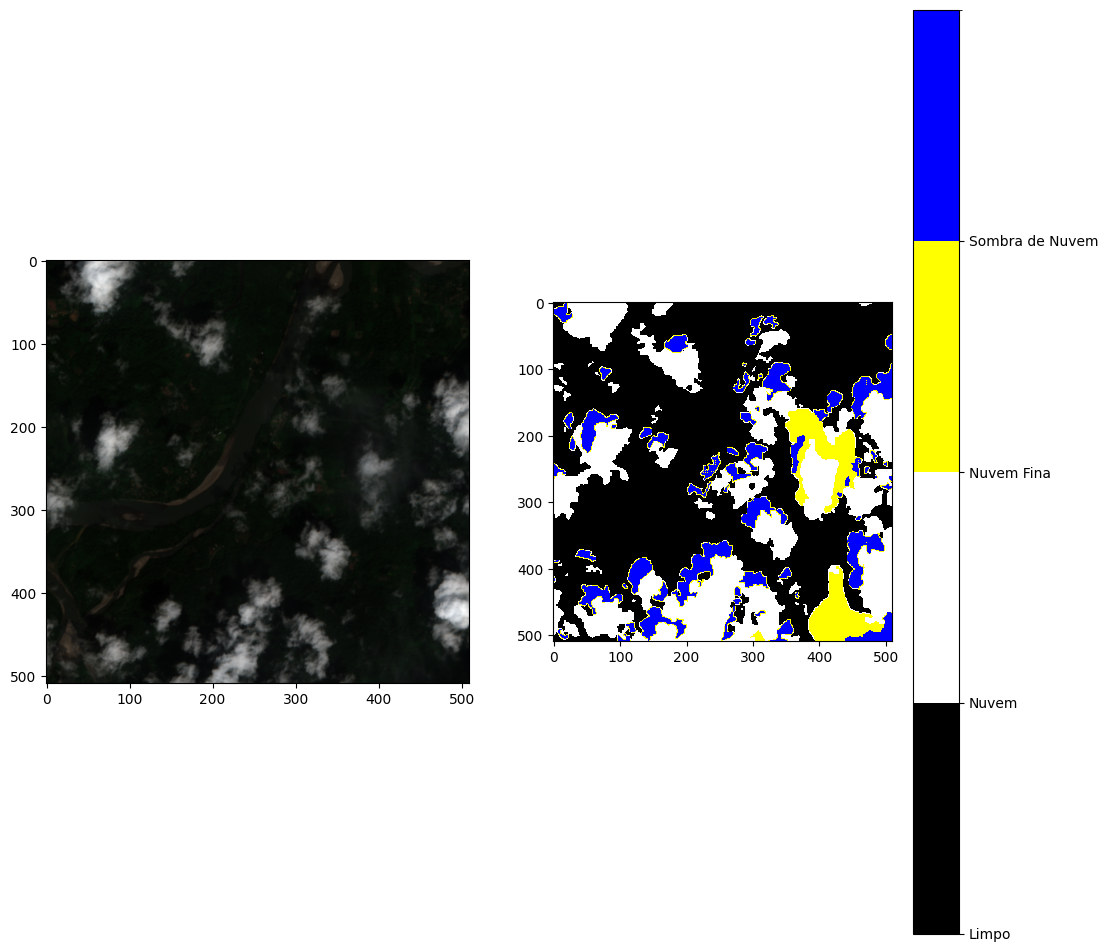

In [10]:

src = rasterio.open(diretorio+imagens[4])
# Ler todas as bandas
bandas = src.read()

# Verificar o número de bandas
print(bandas.shape)  # (n_bandas, altura, largura)
b_r = normalize_band(bandas[3])
b_g = normalize_band(bandas[2])
b_b = normalize_band(bandas[1])

cmap = mcolors.ListedColormap(['black', 'white', 'yellow', 'blue'])  # Defina as cores
bounds = [0, 1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)


rgb_composite_raw = np.dstack((b_r, b_g, b_b))

plt.figure(figsize=(12, 12))
plt.subplot(1,2,1)
plt.imshow(rgb_composite_raw)

plt.subplot(1,2,2)
plt.imshow(bandas[13], cmap=cmap, norm=norm)
cbar = plt.colorbar(ticks=[0, 1, 2, 3])
cbar.set_ticklabels(['Limpo', 'Nuvem', 'Nuvem Fina', 'Sombra de Nuvem'])
plt.show()
